# Case Study 2 : Analyzing data from MovieLens

** Due Date: October 26, BEFORE the beginning of class at 6:00pm **

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

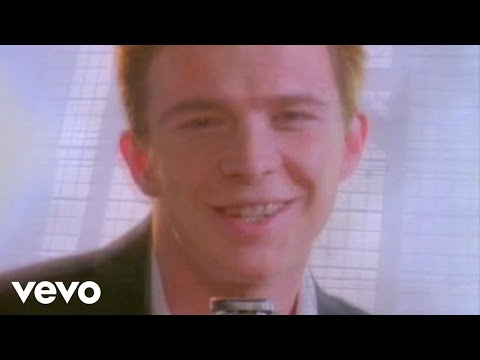

In [2]:
YouTubeVideo('dQw4w9WgXcQ')

**TEAM Members:**

    Jinal Jain
    
    Manasee Godsay
    
    Mihir Sawant
    
    Rushikesh Naidu
    
    Umesh Nair

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path ='ml-1m/ml-1m/users.dat'

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(path, sep='::', header=None, names=unames, engine= 'python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')


# Store the data into an HDF5 file.
datastore = pd.HDFStore('dataset.h5')
datastore['users'] = users
datastore['ratings'] = ratings
datastore['movies'] = movies


# Merge all of the data into a single Pandas DataFrame
data = pd.merge(pd.merge(ratings, users), movies)

mean_ratings = data.pivot_table('rating', index='title', aggfunc='mean')


# How many movies have an average rating over 4.5 overall?
print('Number of movies with average rating over 4.5:', len(mean_ratings[mean_ratings['rating']>=4.5]))
      

# How many movies have an average rating over 4.5 among men? How about women?
rat_by_gender = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
print('Number of movies with average rating over 4.5 among men:', len(rat_by_gender[rat_by_gender['M'] > 4.5]))
print('Number of movies with average rating over 4.5 among women:', len(rat_by_gender[rat_by_gender['F'] > 4.5]))


# How many movies have an median rating over 4.5 among men over age 30?
data_over_30 = data.ix[data['age']>30]
median_ratings = data_over_30.pivot_table('rating',index='title', columns='gender', aggfunc= 'median')

top_male_median_titles = median_ratings.index[median_ratings['M'] > 4.5]
top_male_median_movies = median_ratings.ix[top_male_median_titles]
print('Number of movies with median rating over 4.5 among men over the age of 30:',top_male_median_movies.shape[0])
# How about women over age 30?
top_female_median_titles = median_ratings.index[median_ratings['F'] > 4.5]
top_female_median_movies= median_ratings.ix[top_female_median_titles]
print('Number of movies with median rating over 4.5 among women over the age of 30:',top_female_median_movies.shape[0])


# We define 'popular' by the average rating received by the movie multiplied by the number of ratings.
# This ensures there's no sample bias.
mean_ratings = data.pivot_table('rating', index='title', aggfunc='mean')
tot_ratings = data.pivot_table('rating', index = 'title', aggfunc = 'sum')
mean_ratings.index.name = 'title'
mean_ratings.reset_index(inplace=True)
tot_ratings.index.name = 'title'
tot_ratings.reset_index(inplace=True)
popularity = pd.concat([mean_ratings, tot_ratings], axis = 1)
popularity.columns = ['title','avg_rating', 'title1', 'num_rating']
popularity['pop_index'] = popularity.avg_rating * popularity.num_rating
pop2 = popularity.sort_values('pop_index', ascending = False)
del pop2['title1']


Number of movies with average rating over 4.5: 29
Number of movies with average rating over 4.5 among men: 23
Number of movies with average rating over 4.5 among women: 51
Number of movies with median rating over 4.5 among men over the age of 30: 86
Number of movies with median rating over 4.5 among women over the age of 30: 149


In [8]:
print("Most popular movies:")
pop2[:10]

Most popular movies:


,title,avg_rating,num_rating,pop_index
127,American Beauty (1999),4.317386,14800,63897.316219
3153,Star Wars: Episode IV - A New Hope (1977),4.453694,13321,59327.663323
3154,Star Wars: Episode V - The Empire Strikes Back...,4.292977,12836,55104.647492
2711,Raiders of the Lost Ark (1981),4.477725,11257,50405.747414
2894,Saving Private Ryan (1998),4.337354,11507,49909.931775
2990,"Silence of the Lambs, The (1991)",4.351823,11219,48823.103569
2112,"Matrix, The (1999)",4.315830,11178,48242.349035
3015,"Sixth Sense, The (1999)",4.406263,10835,47741.856446
2901,Schindler's List (1993),4.510417,10392,46872.250000
3155,Star Wars: Episode VI - Return of the Jedi (1983),4.022893,11598,46657.510926


In [9]:
import datetime

datetimes = []
for ratingtime in data['timestamp']:
    datetimes.append(datetime.datetime.fromtimestamp(int(ratingtime)).strftime('%Y-%m-%d %H:%M:%S'))
data['datetime'] = datetimes

from datetime import *

# Extracting hours from the timestamp
hours = []
for date in data['datetime']:
    hours.append(datetime.strptime(date, '%Y-%m-%d %H:%M:%S').hour)
data['hours'] = hours

# Finding days from the timestamp
days = []
for date in data['datetime']:
    days.append(datetime.strptime(date, '%Y-%m-%d %H:%M:%S').strftime('%A'))
data['day'] = days


-----------------------------------------------------------------------------------

In [10]:
# Conjecture 1: Saturday and Sunday has the highest user traffic.

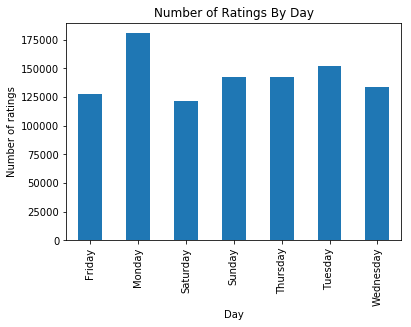

In [11]:
# Descending order of Ratings by Day
import matplotlib.pyplot as plt

day_ratings = data.groupby(['day']).size()
day_ratings.plot(x = 'day', y = 'rating', kind = 'bar')
plt.title('Number of Ratings By Day')
plt.xlabel('Day')
plt.ylabel('Number of ratings')
plt.show()

In [12]:
# Result: False, as we can see that Monday and Tuesday have the highest number of ratings

-----------------------------------------------------------------------------------

In [13]:
# Conjecture 2: Most of the users view movies at night

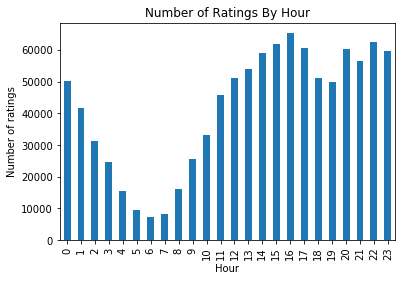

In [14]:
# Descending order of Ratings by Hour of day
import matplotlib.pyplot as plt

time_ratings = data.groupby('hours').size()[:25]
time_ratings.plot(x = 'hours', y = 'rating', kind = 'bar')
plt.title('Number of Ratings By Hour')
plt.xlabel('Hour')
plt.ylabel('Number of ratings')
plt.show()

In [15]:
# Result: False, as we can see that users have rated movies maximum between 3pm & 5pm, and 10pm & 11pm.
# This indicates that people watch movies during lunch and dinner hours

# Assumptions: People rate movies immediately after watching them.

-----------------------------------------------------------------------------------

In [16]:
# Conjecture 3: Users over the age of 50 are easier to please.

In [17]:
age_counts = data.pivot_table('title', index='age', columns='rating', aggfunc='count')
age_counts.rename(index={1: 'Under 18', 18: '18-24', 25: '25-34', 35: '35-44',
                                        45: '45-49', 50: '50-55', 56: '56+'}, inplace=True)
print ('Frequency of Age Groups Ratings')
age_counts

Frequency of Age Groups Ratings


rating,1,2,3,4,5
age,,,,,
Under 18,2238,2983,6380,8808,6802
18-24,13063,22073,47601,60241,40558
25-34,23898,44817,104287,136824,85730
35-44,9067,20253,52990,71983,44710
45-49,3409,8437,22311,30334,19142
50-55,2948,5993,18465,26484,18600
56+,1551,3001,9163,14297,10768


In [18]:
age_counts_norm = age_counts.div(age_counts.sum(1).astype(float), axis=0)
age_counts_norm

rating,1,2,3,4,5
age,,,,,
Under 18,0.082246,0.109625,0.234464,0.323693,0.249972
18-24,0.071174,0.120265,0.259355,0.328224,0.220981
25-34,0.060416,0.113301,0.263647,0.345903,0.216733
35-44,0.045562,0.101772,0.266277,0.361718,0.224670
45-49,0.040761,0.100881,0.266773,0.362704,0.228881
50-55,0.040668,0.082673,0.254725,0.365347,0.256587
56+,0.039995,0.077385,0.236282,0.368669,0.277669


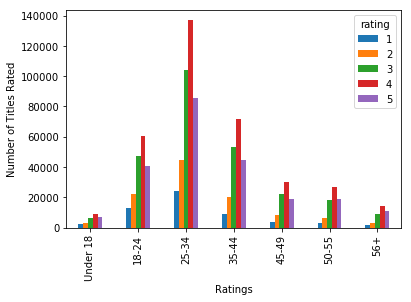

In [19]:
age_counts = data.pivot_table('title', index='age', columns='rating', aggfunc='count')
age_counts.rename(index={1: 'Under 18', 18: '18-24', 25: '25-34', 35: '35-44',
                                        45: '45-49', 50: '50-55', 56: '56+'}, inplace=True)
age_counts.plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Number of Titles Rated')
plt.show()

In [20]:
# Result: True, since the percentage of ratings of 4 and 5 given by the users older than 50 is higher than any other age group.
# This shows that users over the age of 50 are easier to please.

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

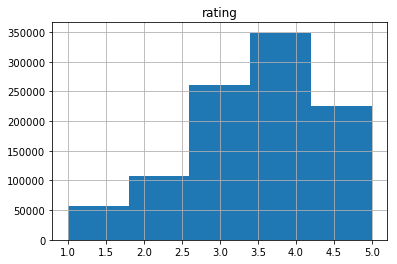

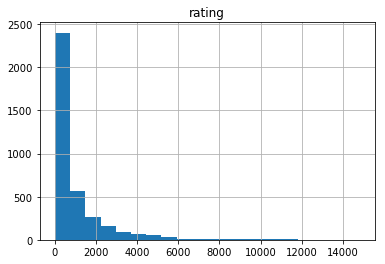

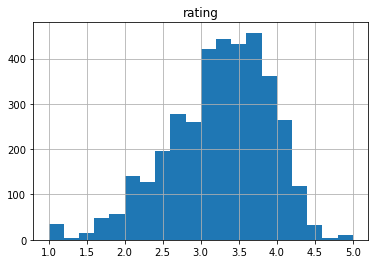

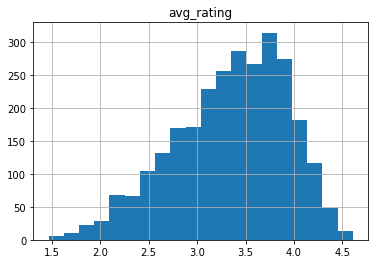

In [21]:
# Plot a histogram of the ratings of all movies.
data.hist(column = 'rating', bins = 5)
plt.show()


# Plot a histogram of the number of ratings each movie recieved.
tot_ratings.hist(column = 'rating', bins = 20)
plt.show()


# Plot a histogram of the average rating for each movie.
mean_ratings.hist(column = 'rating', bins = 20)
plt.show()


# Plot a histogram of the average rating for movies which are rated more than 100 times.
pop2_o_100 = pop2[pop2['num_rating'] > 100]
pop2_o_100.hist(column = 'avg_rating', bins = 20)
plt.show()
# We can see that the tails of the histogram with all the movies are a little more populated than the historgram with 100+ ratings.
# This is because of sample bias and the ratings tend to even out with a larger sample size.
# The ones rated more than 100 times are more trustworthy.


-----------------------------------------------------------------------------------

In [22]:
# Conjecture 1: Scientists like Comedy movies

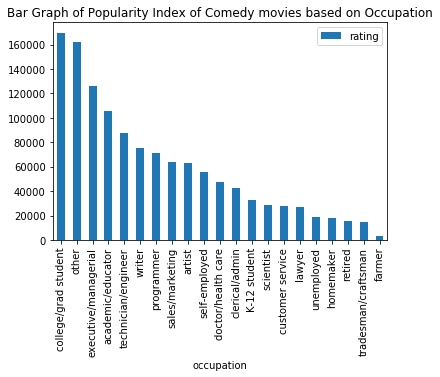

In [23]:
data_com = data[data['genres'].str.contains("Comedy")]
dat_com_occ_rat = data_com.pivot_table("rating", index = "occupation", aggfunc = "sum")
dat_com_occ_rat = dat_com_occ_rat.sort_values(by = "rating", ascending = False)

dat_com_occ_rat.rename(index={0:'other', 1:'academic/educator',2: 'artist',3: 'clerical/admin',4: 'college/grad student',
                                  5: 'customer service',6: 'doctor/health care',7:'executive/managerial',8:'farmer',
                                  9: 'homemaker',10: 'K-12 student',11: 'lawyer',12 :'programmer',13: 'retired',
                                  14:'sales/marketing',15:'scientist',16: 'self-employed',17: 'technician/engineer',
                                  18: 'tradesman/craftsman',19 :'unemployed',20: 'writer'}, inplace=True)

dat_com_occ_rat.plot(x = dat_com_occ_rat.index, kind='bar')
plt.title('Bar Graph of Popularity Index of Comedy movies based on Occupation')
plt.show()


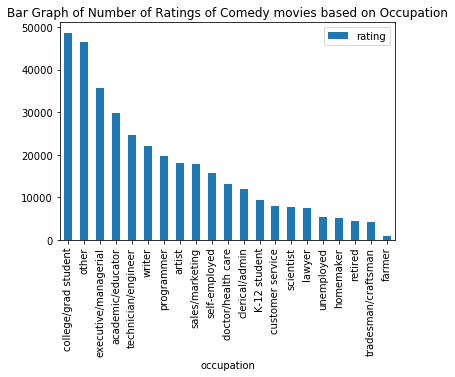

In [24]:
# Bar Graph of Number of Ratings of Comedy movies based on Occupation
data_com = data[data['genres'].str.contains("Comedy")]
dat_com_occ_rat = data_com.pivot_table("rating", index = "occupation", aggfunc = "count")
dat_com_occ_rat = dat_com_occ_rat.sort_values(by = "rating", ascending = False)

dat_com_occ_rat.rename(index={0:'other', 1:'academic/educator',2: 'artist',3: 'clerical/admin',4: 'college/grad student',
                                  5: 'customer service',6: 'doctor/health care',7:'executive/managerial',8:'farmer',
                                  9: 'homemaker',10: 'K-12 student',11: 'lawyer',12 :'programmer',13: 'retired',
                                  14:'sales/marketing',15:'scientist',16: 'self-employed',17: 'technician/engineer',
                                  18: 'tradesman/craftsman',19 :'unemployed',20: 'writer'}, inplace=True)

dat_com_occ_rat.plot(x = dat_com_occ_rat.index, kind='bar')
plt.title('Bar Graph of Number of Ratings of Comedy movies based on Occupation')
plt.show()

In [25]:
# Result: True, because even though total number of ratings are less for scientists, their average rating is more.

-----------------------------------------------------------------------------------

In [26]:
# Conjecture 2: Users under the age of 18 prefer "Children's","Animation" and "Sci-Fi" movies

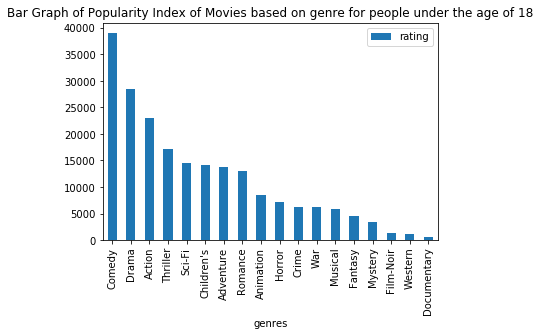

In [27]:
# Bar Graph of Popularity Index of Movies based on genre for people under the age of 18
data_u_18 = data[data.age == 1]
b = pd.DataFrame(data_u_18.genres.str.split('|').tolist(), index=data_u_18.rating).stack()
b = b.reset_index()[[0, 'rating']]
b.columns = ['genres', 'rating']
dat_u_18_sum_rat = b.pivot_table("rating", index = "genres", aggfunc = "sum")
dat_u_18_sum_rat =  dat_u_18_sum_rat.sort_values(by = "rating", ascending = False)
dat_u_18_sum_rat.plot(kind = "bar")
plt.title('Bar Graph of Popularity Index of Movies based on genre for people under the age of 18')
plt.show()

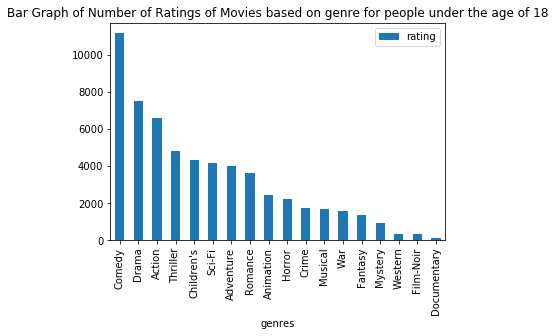

In [28]:
# Bar Graph of Number of Ratings of Movies based on genre for people under the age of 18
data_u_18 = data[data.age == 1]
b = pd.DataFrame(data_u_18.genres.str.split('|').tolist(), index=data_u_18.rating).stack()
b = b.reset_index()[[0, 'rating']]
b.columns = ['genres', 'rating']
dat_u_18_sum_rat = b.pivot_table("rating", index = "genres", aggfunc = "count")
dat_u_18_sum_rat =  dat_u_18_sum_rat.sort_values(by = "rating", ascending = False)
dat_u_18_sum_rat.plot(kind = "bar")
plt.title('Bar Graph of Number of Ratings of Movies based on genre for people under the age of 18')
plt.show()

In [29]:
# Result: True, because even though total number of ratings are more for Children's movies,
# the average rating is more for Sci-Fi movies

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

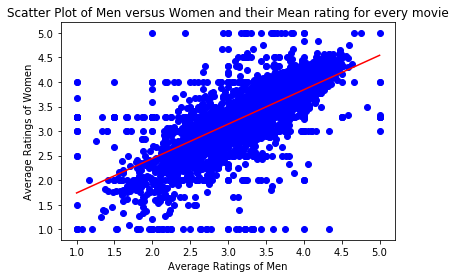

In [30]:
# Make a scatter plot of men versus women and their mean rating for every movie.
mean_ratings1 = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings1["F"].fillna(mean_ratings1["F"].mean(), inplace=True)
mean_ratings1["M"].fillna(mean_ratings1["M"].mean(), inplace=True)
plt.scatter(mean_ratings1.M, mean_ratings1.F, color = 'blue')
plt.plot(np.unique(mean_ratings1.M), np.poly1d(np.polyfit(mean_ratings1.M, mean_ratings1.F, 1))(np.unique(mean_ratings1.M)), 
         color = "red")
plt.title('Scatter Plot of Men versus Women and their Mean rating for every movie')
plt.xlabel('Average Ratings of Men')
plt.ylabel('Average Ratings of Women')
plt.show()

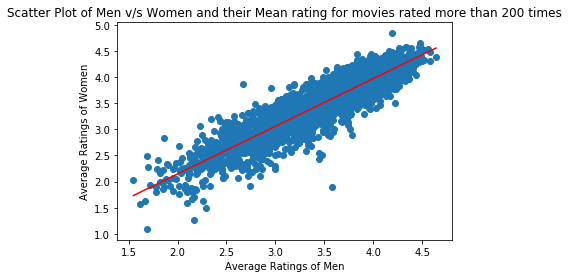

In [31]:
# Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
mean_ratings1.index.name = 'title'
mean_ratings1.reset_index(inplace=True)
tot_ratings_200 = tot_ratings[tot_ratings.rating > 200]
fin_mf_rat = pd.merge(tot_ratings_200, mean_ratings1)
fin_mf_rat["F"].fillna(fin_mf_rat["F"].mean(), inplace=True)
fin_mf_rat["M"].fillna(fin_mf_rat["M"].mean(), inplace=True)
plt.scatter(fin_mf_rat.M, fin_mf_rat.F)
plt.plot(np.unique(fin_mf_rat.M), np.poly1d(np.polyfit(fin_mf_rat.M, fin_mf_rat.F, 1))(np.unique(fin_mf_rat.M)), color = "red")
plt.title('Scatter Plot of Men v/s Women and their Mean rating for movies rated more than 200 times')
plt.xlabel('Average Ratings of Men')
plt.ylabel('Average Ratings of Women')
plt.show()

In [32]:
# Computing the correlation coefficent between the ratings of men and women.
np.corrcoef(mean_ratings1.M, mean_ratings1.F)[0,1]
# We observe that there's a correlation of about 69% between the ratings of men and women
# It means that the ratings by men and women are somewhat strongly predictable by each other.

0.69170575201737639

-----------------------------------------------------------------------------------

In [33]:
# Conjecture 1 : We can predict the ratings of Action movies given by women looking at the ratings given by men.

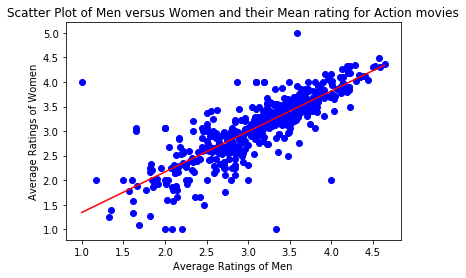

0.82115492725888195

In [34]:
data_docu = data[data['genres'].str.contains("Action")]

mean_ratings_docu = data_docu.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
tot_ratings_docu = data_docu.pivot_table('rating', index = 'title', aggfunc = 'sum')
x=mean_ratings_docu["M"]
y=mean_ratings_docu["F"]
y.fillna(y.mean(), inplace=True)
x.fillna(x.mean(), inplace=True)
plt.scatter(x,y, color = "blue")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "red")
plt.title('Scatter Plot of Men versus Women and their Mean rating for Action movies')
plt.xlabel('Average Ratings of Men')
plt.ylabel('Average Ratings of Women')
plt.show()
np.corrcoef(x,y)[0,1]

In [35]:
# Training a linear regression model to test predictability
import warnings
warnings.filterwarnings('ignore')

from sklearn import cross_validation, linear_model, feature_selection, metrics
X = mean_ratings_docu.ix[:,['M']]
Y = mean_ratings_docu.ix[:,['F']]

X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,Y,test_size=0.3)

# Running the model
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

# Compute the slope and intercept of the linear model
print('Intercept: ', reg.intercept_)
# Beta_1
print('Coefficient: ', reg.coef_)

# Compute testing and training error.
print('Training error: ', metrics.mean_squared_error(y_train,reg.predict(X_train)))
print('Testing error: ', metrics.mean_squared_error(y_test,reg.predict(X_test)))

Intercept:  [ 0.3955393]
Coefficient:  [[ 0.86433189]]
Training error:  0.131846203009
Testing error:  0.179792645824


In [36]:
# Result: True, since the correlation coefficient is 0.821, we can predict the ratings of Action movies given by women
# looking at the ratings given by men, with a test error of 17.979%.

-----------------------------------------------------------------------------------

In [37]:
# Conjecture 2: We can predict ratings given by women in the age group 18-25 for Romance movie looking at the men's ratings

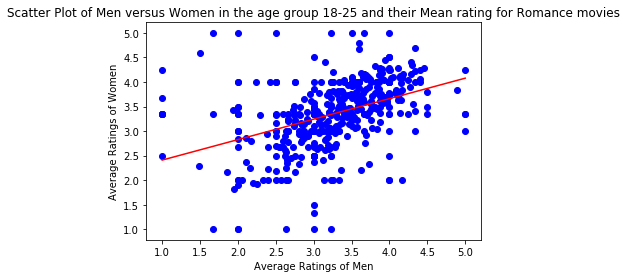

0.41468936538068046

In [38]:
data_u_12 = data[data.age==18]
data_docu = data_u_12[data_u_12['genres'].str.contains("Romance")]
mean_ratings_docu = data_docu.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
tot_ratings_docu = data_docu.pivot_table('rating', index = 'title', aggfunc = 'sum')
x=mean_ratings_docu["M"]
y=mean_ratings_docu["F"]
y.fillna(y.mean(), inplace=True)
x.fillna(x.mean(), inplace=True)
plt.scatter(x,y, color = "blue")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "red")
plt.title('Scatter Plot of Men versus Women in the age group 18-25 and their Mean rating for Romance movies')
plt.xlabel('Average Ratings of Men')
plt.ylabel('Average Ratings of Women')
plt.show()
np.corrcoef(x,y)[0,1]

In [39]:
X = mean_ratings_docu.ix[:,['M']]
Y = mean_ratings_docu.ix[:,['F']]

X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.3)
# Running the model
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

# Compute the slope and intercept of the linear model
print('Intercept: ', reg.intercept_)
# Beta_1
print('Coefficient: ', reg.coef_)

# Compute testing and training error.
print('Training error: ', metrics.mean_squared_error(y_train,reg.predict(X_train)))
print('Testing error: ', metrics.mean_squared_error(y_test,reg.predict(X_test)))

Intercept:  2.00568978375
Coefficient:  [ 0.4163541]
Training error:  0.437241158828
Testing error:  0.380143891158


In [40]:
# Result: False, since the correlation coefficient is only 0.414689 even though we get a test error of 38%.

In [41]:
# Conjecture 3 : We can predict a female grad student's rating for a Horror movie based on a male grad student's rating

-----------------------------------------------------------------------------------

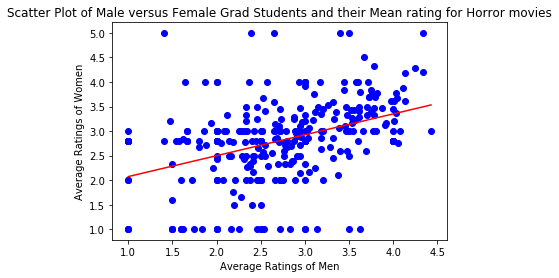

0.40747090685519805

In [42]:
data_u_12 = data[data.occupation==4 ]
data_u_13= data_u_12[data_u_12['genres'].str.contains("Horror")]
mean_ratings_docu = data_u_13.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
tot_ratings_docu = data_docu.pivot_table('rating', index = 'title', aggfunc = 'sum')
x=mean_ratings_docu["M"]
y=mean_ratings_docu["F"]
y.fillna(y.mean(), inplace=True)
x.fillna(x.mean(), inplace=True)
plt.scatter(x,y, color = "blue")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "red")
plt.title('Scatter Plot of Male versus Female Grad Students and their Mean rating for Horror movies')
plt.xlabel('Average Ratings of Men')
plt.ylabel('Average Ratings of Women')
plt.show()
np.corrcoef(x,y)[0,1]

In [43]:
X = mean_ratings_docu.ix[:,['M']]
Y = mean_ratings_docu.ix[:,['F']]

X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.3)
# Running the model
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

# Compute the slope and intercept of the linear model
print('Intercept: ', reg.intercept_)
# Beta_1
print('Coefficient: ', reg.coef_)

# Compute testing and training error.
print('Training error: ', metrics.mean_squared_error(y_train,reg.predict(X_train)))
print('Testing error: ', metrics.mean_squared_error(y_test,reg.predict(X_test)))

Intercept:  1.54007007256
Coefficient:  [ 0.4665065]
Training error:  0.62049060959
Testing error:  0.477298024228


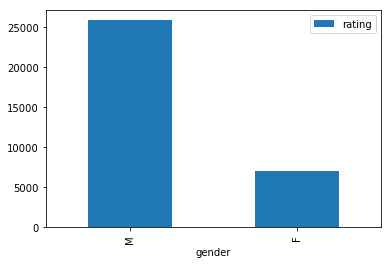

In [44]:
# Men and women have dissimilar preferences when it comes to Horror movies

data_u_12 = data[data.occupation==4]
data_u_13= data_u_12[data_u_12['genres'].str.contains("Horror")]

mean_ratings_docu = data_u_13.pivot_table('rating', index='gender', aggfunc='mean')
tot_ratings_docu = data_u_13.pivot_table('rating', index = 'gender', aggfunc = 'sum')
tot_ratings_docu=tot_ratings_docu.sort_values(by='rating',ascending= False)
tot_ratings_docu.plot(kind='bar')
plt.show()

In [45]:
# Result: False, since the correlation coefficient is only 0.40747 even though we get a test error of 47.73%.

-----------------------------------------------------------------------------------------------------------------------

In [46]:
# Conjecture 4 : Men and women have similar preferences when they're younger

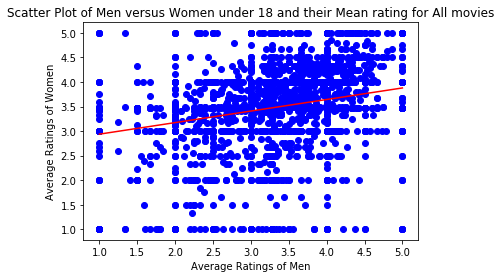

0.24543526069221033

In [47]:
data_u_12 = data[data.age<=12]
mean_ratings_u_12 = data_u_12.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
tot_ratings_u_12 = data_u_12.pivot_table('rating', index = 'title', aggfunc = 'sum')
x=mean_ratings_u_12["M"]
y=mean_ratings_u_12["F"]
y.fillna(y.mean(), inplace=True)
x.fillna(x.mean(), inplace=True)
plt.scatter(x,y, color = "blue")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "red")
plt.title('Scatter Plot of Men versus Women under 18 and their Mean rating for All movies')
plt.xlabel('Average Ratings of Men')
plt.ylabel('Average Ratings of Women')
plt.show()
np.corrcoef(x,y)[0,1]

In [48]:
# Result: False, since the correlation coefficient is only 0.2454, we cannot say with certainty that young men and women have
# similar preferences.

-----------------------------------------------------------------------------------

In [49]:
# Conjecture 5 : Men and women have similar preferences when they're older

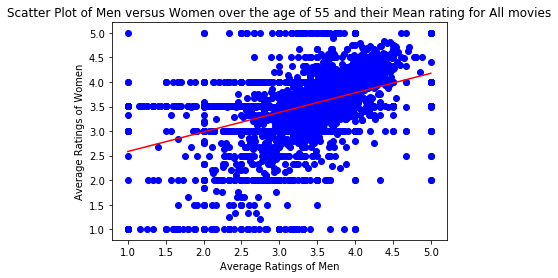

0.42870535407002869

In [50]:
data_o_50 = data[data.age>=50]
mean_ratings_o_50 = data_o_50.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
tot_ratings_o_50 = data_o_50.pivot_table('rating', index = 'title', aggfunc = 'sum')
x=mean_ratings_o_50["M"]
y=mean_ratings_o_50["F"]
y.fillna(y.mean(), inplace=True)
x.fillna(x.mean(), inplace=True)
plt.scatter(x,y, color = "blue")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "red")
plt.title('Scatter Plot of Men versus Women over the age of 55 and their Mean rating for All movies')
plt.xlabel('Average Ratings of Men')
plt.ylabel('Average Ratings of Women')
plt.show()
np.corrcoef(x,y)[0,1]

In [51]:
# Result: False, since the correlation coefficient is only 0.4287, we cannot say with certainty that older men and women have
# similar preferences.

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

In [52]:
########################################## BUSINESS QUESTIONS ####################################################

In [53]:
# QUESTION 1: What genre of movies are preferred by Working and Non-working users?

In [54]:
unemp_code = [4, 9, 10, 13, 19]
unemployed = data[data.occupation.isin(unemp_code)]
employed = data[~data.occupation.isin(unemp_code)]

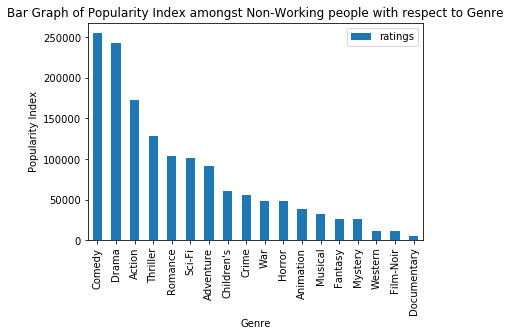

In [55]:
# Popularity Index amongst Non-Working people with respect to Genre
unemployed_gen = pd.DataFrame(unemployed.genres.str.split('|').tolist(), index=unemployed.rating).stack()
unemployed_gen = unemployed_gen.reset_index()[[0, 'rating']]
unemployed_gen.columns = ['genres', 'ratings']

unemployed_gen = unemployed_gen.pivot_table('ratings',index='genres',aggfunc='sum')
unemployed_gen = unemployed_gen.sort_values(by = 'ratings', ascending=False)
unemployed_gen.plot(x = unemployed_gen.index, y = 'ratings',kind = 'bar')
plt.title('Bar Graph of Popularity Index amongst Non-Working people with respect to Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity Index')
plt.show()

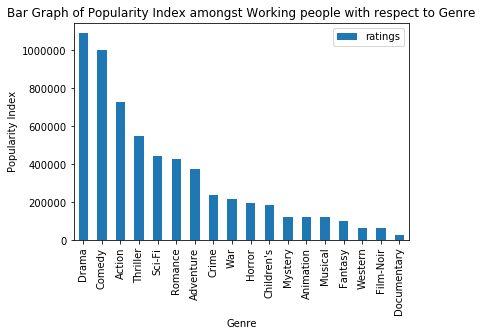

In [56]:
# Popularity Index amongst Working people with respect to Genre
employed_gen = pd.DataFrame(employed.genres.str.split('|').tolist(), index=employed.rating).stack()
employed_gen = employed_gen.reset_index()[[0, 'rating']]
employed_gen.columns = ['genres', 'ratings']

employed_gen = employed_gen.pivot_table('ratings',index='genres',aggfunc='sum')
employed_gen = employed_gen.sort_values(by = 'ratings', ascending=False)
employed_gen.plot(x = employed_gen.index, y = 'ratings',kind = 'bar')
plt.title('Bar Graph of Popularity Index amongst Working people with respect to Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity Index')
plt.show()

In [57]:
# Results:-
# Based on their popularity index graphs, we can say that both Working and Non-working users prefer Comedy and Drama movies 
# over the other genres.

-----------------------------------------------------------------------------------

In [58]:
# QUESTION 2: What is the best day of the week to recommend movies to Working and Non-Working users?

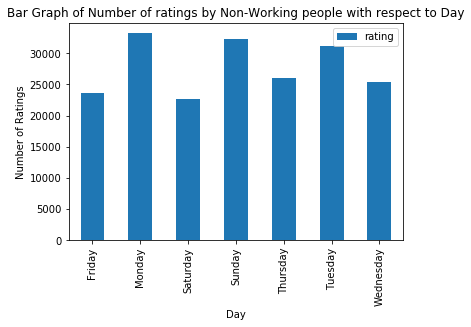

In [59]:
# Number of ratings by Non-Working people with respect to Day

unemployed_rating_day = unemployed.pivot_table('rating',index='day',aggfunc='count')
unemployed_rating_day.plot(x = unemployed_rating_day.index, y = 'rating',kind = 'bar')
plt.title('Bar Graph of Number of ratings by Non-Working people with respect to Day')
plt.xlabel('Day')
plt.ylabel('Number of Ratings')
plt.show()

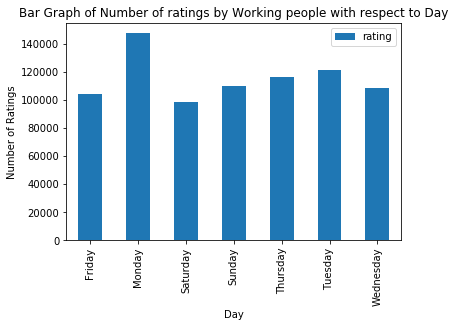

In [60]:
# Number of ratings by Working people with respect to Day

employed_rating_day = employed.pivot_table('rating',index='day',aggfunc='count')
employed_rating_day.plot(x = employed_rating_day.index, y = 'rating',kind = 'bar')
plt.title('Bar Graph of Number of ratings by Working people with respect to Day')
plt.xlabel('Day')
plt.ylabel('Number of Ratings')
plt.show()

-----------------------------------------------------------------------------------

In [61]:
# Results:-
# Based on the graphs plotted, 
# For Non-Working users, the distribution of views is almost uniform over all the days, with Sundays, Mondays and Tuesdays
# having comparatively higher views.
# We can say that Monday is the best day to recommend movies to Working users.

In [62]:
# QUESTION 3: What is the best time of the day to recommend movies to Working and Non-Working users?

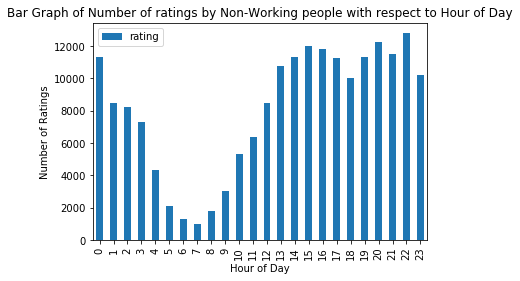

In [63]:
# Number of ratings by Non-Working people with respect to Hour of Day
unemployed_rating_hour = unemployed.pivot_table('rating',index='hours',aggfunc='count')
unemployed_rating_hour.plot(x = unemployed_rating_hour.index, y = 'rating',kind = 'bar')
plt.title('Bar Graph of Number of ratings by Non-Working people with respect to Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Ratings')
plt.show()

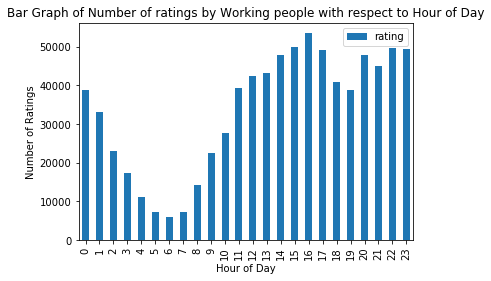

In [64]:
# Number of ratings by Working people with respect to Hour of Day
employed_rating_hour = employed.pivot_table('rating',index='hours',aggfunc='count')
employed_rating_hour.plot(x = employed_rating_hour.index, y = 'rating',kind = 'bar')
plt.title('Bar Graph of Number of ratings by Working people with respect to Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Ratings')
plt.show()

In [65]:
# Results:-
# Based on the graphs plotted, 
# We can say that 8pm to 10pm is the best time of the day to recommend movies to Non-Working users, and 3pm to 5pm is the 
# best time of the day to recommend movies to Working users.
# And Non-working users tend to rate movies more during the wee hours(12 to 4 am) as compared to Working users.

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*----------------------
Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 2 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **